In [1]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [2]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 106MB/s]


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PmukDnUT1rbRGgjlMM50")
project = rf.workspace("graphpuch").project("fish-detection-k9myl-klbpw")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fish-Detection-1 in yolov8:: 100%|██████████| 1540/1540 [00:00<00:00, 2937.95it/s]


In [4]:
!pip install PyYAML

In [5]:
import yaml

data = {
    'train': '/content/Fish-Detection-1/train/images',
    'test': '/content/Fish-Detection-1/test/images',
    'val': '/content/Fish-Detection-1/valid/images',
    'names': ['fish'],
    'nc': 1
}

with open("/content/Fish-Detection-1/data.yaml", "w") as f:
    yaml.dump(data, f)

with open("/content/Fish-Detection-1/data.yaml", "r") as f:
    Y = yaml.safe_load(f)
    display(Y)

{'names': ['fish'],
 'nc': 1,
 'test': '/content/Fish-Detection-1/test/images',
 'train': '/content/Fish-Detection-1/train/images',
 'val': '/content/Fish-Detection-1/valid/images'}

In [6]:
import torch, os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.train(data='/content/Fish-Detection-1/data.yaml', epochs=50, imgsz=200, patience=30, batch=8, device=device, workers=0)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Fish-Detection-1/data.yaml, epochs=50, time=None, patience=30, batch=8, imgsz=200, save=True, save_period=-1, cache=False, device=cuda, workers=0, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 26.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.5MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[200] must be multiple of max stride 32, updating to [224]


train: Scanning /content/Fish-Detection-1/train/labels... 538 images, 13 backgrounds, 0 corrupt: 100%|██████████| 538/538 [00:00<00:00, 1670.93it/s]

train: New cache created: /content/Fish-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Fish-Detection-1/valid/labels... 152 images, 6 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<00:00, 1754.32it/s]

val: New cache created: /content/Fish-Detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.294G      1.918      2.168      1.311         10        224: 100%|██████████| 68/68 [00:11<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]

                   all        152        897      0.579      0.538      0.536      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      0.25G      1.922      1.446      1.266          2        224: 100%|██████████| 68/68 [00:10<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.53it/s]

                   all        152        897      0.513      0.469      0.457      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.262G      1.909      1.356      1.281         14        224: 100%|██████████| 68/68 [00:10<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.50it/s]

                   all        152        897       0.54      0.484      0.444      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.254G       1.79       1.26      1.261         13        224: 100%|██████████| 68/68 [00:15<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.99it/s]

                   all        152        897      0.603      0.575      0.565      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.241G      1.795      1.247      1.247         58        224: 100%|██████████| 68/68 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]

                   all        152        897      0.629      0.572      0.585      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.254G      1.749      1.206      1.228         20        224: 100%|██████████| 68/68 [00:13<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.27it/s]

                   all        152        897      0.604       0.61      0.609      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.241G      1.723      1.183      1.229         27        224: 100%|██████████| 68/68 [00:12<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.10it/s]

                   all        152        897      0.654       0.54      0.585      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.254G       1.77      1.178      1.228         16        224: 100%|██████████| 68/68 [00:09<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.42it/s]

                   all        152        897      0.659      0.619      0.612      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.262G      1.699      1.138      1.209         15        224: 100%|██████████| 68/68 [00:09<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.54it/s]

                   all        152        897      0.676      0.634      0.661      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.254G       1.62      1.086      1.174         10        224: 100%|██████████| 68/68 [00:09<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.59it/s]

                   all        152        897      0.681      0.599      0.651      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.241G      1.677      1.112       1.19         15        224: 100%|██████████| 68/68 [00:12<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        152        897      0.695      0.625      0.681      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.262G       1.64      1.104      1.169         21        224: 100%|██████████| 68/68 [00:13<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.52it/s]

                   all        152        897      0.754      0.625      0.697      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.241G      1.661      1.069      1.178         88        224: 100%|██████████| 68/68 [00:09<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.39it/s]

                   all        152        897      0.702      0.651      0.686      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.252G      1.644      1.051      1.157         21        224: 100%|██████████| 68/68 [00:09<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.53it/s]

                   all        152        897      0.702      0.629      0.687      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.254G      1.613      1.048      1.153         31        224: 100%|██████████| 68/68 [00:09<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.34it/s]

                   all        152        897       0.72      0.641      0.687       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.262G      1.592     0.9946      1.154         27        224: 100%|██████████| 68/68 [00:08<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.38it/s]

                   all        152        897      0.725      0.614      0.692      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      0.26G      1.565     0.9992       1.14          7        224: 100%|██████████| 68/68 [00:08<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.60it/s]

                   all        152        897      0.705      0.647      0.703      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.252G      1.578      1.021      1.148          8        224: 100%|██████████| 68/68 [00:09<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.40it/s]

                   all        152        897      0.759      0.647      0.719      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.254G       1.53     0.9709      1.122         38        224: 100%|██████████| 68/68 [00:09<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.48it/s]

                   all        152        897      0.694      0.635      0.691      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.239G      1.518     0.9736      1.126         27        224: 100%|██████████| 68/68 [00:10<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.65it/s]

                   all        152        897       0.75      0.622      0.707      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.254G      1.563     0.9833      1.123         34        224: 100%|██████████| 68/68 [00:09<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.45it/s]

                   all        152        897       0.74      0.663       0.73      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.254G      1.505     0.9647      1.121          9        224: 100%|██████████| 68/68 [00:10<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.40it/s]

                   all        152        897      0.744      0.653      0.727      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.241G      1.534     0.9576      1.136          9        224: 100%|██████████| 68/68 [00:10<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.57it/s]

                   all        152        897      0.736      0.672      0.727      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.262G      1.492     0.9382      1.119         40        224: 100%|██████████| 68/68 [00:08<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        152        897      0.758       0.67      0.726      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.256G      1.512     0.9422      1.122         27        224: 100%|██████████| 68/68 [00:08<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.32it/s]

                   all        152        897      0.745      0.681      0.736      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.262G       1.52     0.9438      1.141         19        224: 100%|██████████| 68/68 [00:09<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.55it/s]

                   all        152        897      0.769      0.674      0.746      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.262G      1.459     0.9078      1.107         22        224: 100%|██████████| 68/68 [00:09<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]

                   all        152        897      0.741      0.675      0.716      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.241G      1.494     0.9137       1.11         18        224: 100%|██████████| 68/68 [00:09<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.68it/s]

                   all        152        897      0.735      0.682      0.729      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.241G      1.457     0.8797      1.085         19        224: 100%|██████████| 68/68 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.61it/s]

                   all        152        897      0.752       0.68      0.737      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.252G      1.456     0.8991      1.102          7        224: 100%|██████████| 68/68 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.54it/s]

                   all        152        897      0.763      0.696      0.753      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.239G      1.452     0.8997      1.106         15        224: 100%|██████████| 68/68 [00:09<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        152        897      0.759      0.704      0.754      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.241G       1.43     0.8607      1.084         32        224: 100%|██████████| 68/68 [00:08<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]

                   all        152        897      0.768       0.68      0.745       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.239G      1.444     0.8722      1.101         13        224: 100%|██████████| 68/68 [00:08<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.52it/s]

                   all        152        897      0.767      0.646      0.723      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.252G      1.375     0.8444      1.077         28        224: 100%|██████████| 68/68 [00:10<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.71it/s]

                   all        152        897      0.751      0.677      0.737      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      0.26G      1.441      0.863      1.087         17        224: 100%|██████████| 68/68 [00:09<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.54it/s]

                   all        152        897       0.76      0.654      0.735      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.254G      1.381     0.8328      1.076         21        224: 100%|██████████| 68/68 [00:09<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.63it/s]

                   all        152        897      0.805      0.659      0.751       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.262G      1.419      0.849      1.082         46        224: 100%|██████████| 68/68 [00:09<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.70it/s]

                   all        152        897       0.77      0.685      0.747      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.241G      1.434     0.8462      1.084         17        224: 100%|██████████| 68/68 [00:09<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.58it/s]

                   all        152        897      0.792       0.69      0.751      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.256G      1.357     0.8131      1.064         22        224: 100%|██████████| 68/68 [00:08<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        152        897      0.773      0.683      0.755      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.254G      1.356     0.8078      1.057         11        224: 100%|██████████| 68/68 [00:08<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.03it/s]

                   all        152        897       0.79      0.685      0.769      0.446


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.262G       1.32     0.8604      1.034         23        224: 100%|██████████| 68/68 [00:09<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.62it/s]

                   all        152        897       0.79      0.688      0.745      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.241G      1.297     0.8246      1.033          5        224: 100%|██████████| 68/68 [00:09<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.76it/s]

                   all        152        897      0.767      0.682      0.749      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.262G      1.293     0.7834      1.038          2        224: 100%|██████████| 68/68 [00:09<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.52it/s]

                   all        152        897      0.787      0.685      0.752       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.262G      1.275     0.7806      1.035         21        224: 100%|██████████| 68/68 [00:09<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.71it/s]

                   all        152        897      0.797      0.692      0.757      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.241G      1.256      0.759      1.018         14        224: 100%|██████████| 68/68 [00:08<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        152        897      0.782      0.698      0.753      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.241G      1.246     0.7424      1.024          3        224: 100%|██████████| 68/68 [00:09<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.82it/s]

                   all        152        897      0.801      0.679      0.761      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.262G      1.248     0.7546      1.027          3        224: 100%|██████████| 68/68 [00:08<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.47it/s]

                   all        152        897      0.779      0.699      0.758      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      0.26G      1.228     0.7348      1.008         10        224: 100%|██████████| 68/68 [00:08<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.74it/s]

                   all        152        897      0.773      0.696      0.758      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      0.26G       1.23     0.7333      1.011          9        224: 100%|██████████| 68/68 [00:08<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.74it/s]

                   all        152        897       0.78      0.706      0.768      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.262G      1.245     0.7323      1.019         24        224: 100%|██████████| 68/68 [00:09<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.62it/s]

                   all        152        897      0.775      0.705      0.765      0.454



50 epochs completed in 0.167 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]


                   all        152        897       0.78      0.705      0.768      0.454
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e11b9eeb0a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
results = model.predict(source = '/content/Fish-Detection-1/test/images', save = True)


image 1/74 /content/Fish-Detection-1/test/images/22_JPG.rf.5d552d9e08d4791d7e7f1f45fd7a38ae.jpg: 96x224 9 fishs, 51.2ms
image 2/74 /content/Fish-Detection-1/test/images/302935-nature_jpg.rf.6af3b5483bcbab48ee06f2d379ae3d2d.jpg: 160x224 8 fishs, 50.2ms
image 3/74 /content/Fish-Detection-1/test/images/72a182f00f4f77beccc2fb3e6ddac440-1-_jpg.rf.89f5a4ca470b8a54b8469e2acf4c3c1d.jpg: 160x224 10 fishs, 10.2ms
image 4/74 /content/Fish-Detection-1/test/images/996688-fish-many-goldfish-animals-wallpapers-748x561-1-_jpg.rf.7ae9878ce985eb59d50d9d40c3476306.jpg: 192x224 21 fishs, 60.3ms
image 5/74 /content/Fish-Detection-1/test/images/Fish-In-Aquarium_jpg.rf.11e165423af6bb926a539210f312ae0f.jpg: 160x224 3 fishs, 12.5ms
image 6/74 /content/Fish-Detection-1/test/images/Importance-of-Fish-and-Aquariums-in-Vastu-1-_jpg.rf.95fed986ca5953aec661ce2329a1bbbd.jpg: 160x224 9 fishs, 8.7ms
image 7/74 /content/Fish-Detection-1/test/images/capture22_JPG.rf.71608b50cfcde2f5fa7307015dc3a7a8.jpg: 96x224 7 fishs, 

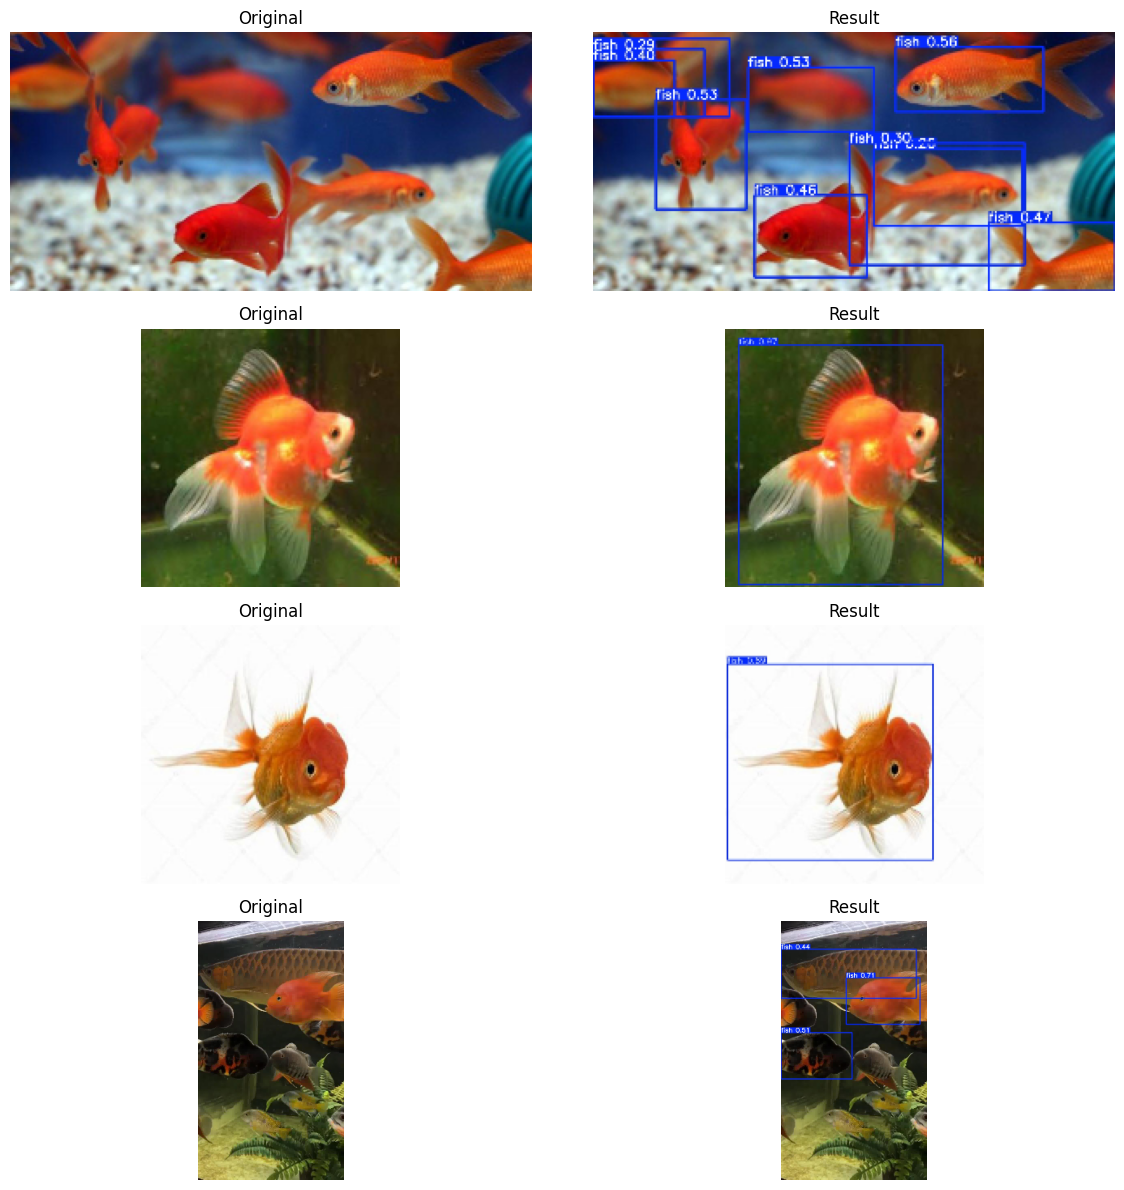

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

datapath = '/content/Fish-Detection-1/test/images'
resultpath = '/content/runs/detect/train2'

# 읽을 최대 이미지 수
max_images = 16

# 이미지 저장용 리스트
original_images = []
result_images = []

# 데이터 로드
for cnt, i in enumerate(os.listdir(datapath)):
    if cnt >= max_images:
        break
    imagepath = os.path.join(datapath, i)
    rshowpath = os.path.join(resultpath, i)

    # 원본 이미지와 결과 이미지 읽기
    ori_img = cv2.imread(imagepath)
    result_img = cv2.imread(rshowpath)

    # 이미지 크기 조정 (1/16으로 축소)
    ori_img = cv2.resize(ori_img, (ori_img.shape[1] // 4, ori_img.shape[0] // 4))
    result_img = cv2.resize(result_img, (result_img.shape[1] // 4, result_img.shape[0] // 4))

    # 이미지를 리스트에 추가 (RGB 형식으로 변환)
    original_images.append(cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB))
    result_images.append(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

# 출력: 4x4 배열로 그리기
fig, axes = plt.subplots(4, 2, figsize=(12, 12))  # 4x4 사이즈, figsize는 유지

for idx in range(4):
    # 원본 이미지 (왼쪽)
    axes[idx, 0].imshow(original_images[idx])
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title("Original")

    # 결과 이미지 (오른쪽)
    axes[idx, 1].imshow(result_images[idx])
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title("Result")

plt.tight_layout()
plt.show()

In [9]:
import locale
def getpreferredencoding(do_set=True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!yolo mode=val model={model.ckpt} data="/content/Fish-Detection-1/data.yaml"

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `yolo mode=val model={'date': '2022-12-30T00:12:08.084698', 'version': '8.0.0.dev0', 'license': 'AGPL-3.0 License (https://ultralytics.com/license)', 'docs': 'https://docs.ultralytics.com', 'epoch': -1, 'best_fitness': None, 'model': DetectionModel('


In [10]:
import time

start_time = time.time()
results = model.predict(source = '/content/Fish-Detection-1/test/images', save = True)
end_time = time.time()

fps = 100 / (end_time - start_time)
print(f"FPS: {fps:.2f}")


image 1/74 /content/Fish-Detection-1/test/images/22_JPG.rf.5d552d9e08d4791d7e7f1f45fd7a38ae.jpg: 96x224 9 fishs, 20.3ms
image 2/74 /content/Fish-Detection-1/test/images/302935-nature_jpg.rf.6af3b5483bcbab48ee06f2d379ae3d2d.jpg: 160x224 8 fishs, 20.4ms
image 3/74 /content/Fish-Detection-1/test/images/72a182f00f4f77beccc2fb3e6ddac440-1-_jpg.rf.89f5a4ca470b8a54b8469e2acf4c3c1d.jpg: 160x224 10 fishs, 16.8ms
image 4/74 /content/Fish-Detection-1/test/images/996688-fish-many-goldfish-animals-wallpapers-748x561-1-_jpg.rf.7ae9878ce985eb59d50d9d40c3476306.jpg: 192x224 21 fishs, 22.6ms
image 5/74 /content/Fish-Detection-1/test/images/Fish-In-Aquarium_jpg.rf.11e165423af6bb926a539210f312ae0f.jpg: 160x224 3 fishs, 11.9ms
image 6/74 /content/Fish-Detection-1/test/images/Importance-of-Fish-and-Aquariums-in-Vastu-1-_jpg.rf.95fed986ca5953aec661ce2329a1bbbd.jpg: 160x224 9 fishs, 13.3ms
image 7/74 /content/Fish-Detection-1/test/images/capture22_JPG.rf.71608b50cfcde2f5fa7307015dc3a7a8.jpg: 96x224 7 fishs,

In [13]:
value = model.val(source = '/content/Fish-Detection-1/data.yaml')

print(dir(value))

map_50 = value.box.map50
map_50_95 = value.box.map

print(f"mAP@0.5: {map_50:.4f}")
print(f"mAP@0.5:0.95: {map_50_95:.4f}")

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Fish-Detection-1/valid/labels.cache... 152 images, 6 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:01<00:00,  9.96it/s]


                   all        152        897      0.788      0.698      0.763      0.454
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train5
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']
mAP@0.5: 0.7632
mAP@0.5:0.95: 0.4538
